###**Cara Kerja Algortma K-Means**

**Data Mining (A)**

**Rayna Shera Chang / 0706022310022**

## Import Library

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.metrics import confusion_matrix

# Mess Personnel Dataset (Dataset Kecil)

## Data Load

In [2]:
# Load dataset
data = "https://gist.githubusercontent.com/amgunawan/71c6addeed24d8a7d066dfc7fe7e0d06/raw/2bd81ddc2c181b27e507c0a0cacae841a4522575/mess_personnel_dataset.csv"
df = pd.read_csv(data)

# Preview the dataset
df

,Food Item,Protein,Fat
0,#1,1.1,60
1,#2,8.2,20
2,#3,4.2,35
3,#4,1.5,21
4,#5,7.6,15
5,#6,2.0,55
6,#7,3.9,39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Food Item  7 non-null      object 
 1   Protein    7 non-null      float64
 2   Fat        7 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 300.0+ bytes


Output tersebut menunjukkan bahwa dataframe berisi 7 baris dengan 3 kolom yang semuanya terisi dan memiliki tipe data sesuai (object dan numerik).

In [4]:
df.describe()

,Protein,Fat
count,7.000000,7.00000
mean,4.071429,35.00000
std,2.865725,17.61628
min,1.100000,15.00000
25%,1.750000,20.50000
50%,3.900000,35.00000
75%,5.900000,47.00000
max,8.200000,60.00000


## Data Preprocessing

In [5]:
df[df.duplicated(keep=False)]

,Food Item,Protein,Fat


Output tersebut menunjukkan bahwa **tidak ada data duplikasi** dalam dataframe.

In [6]:
df.isnull().sum()

,0
Food Item,0
Protein,0
Fat,0


Tidak ditemukan nilai kosong (missing values) pada seluruh kolom dalam dataset.

## Data Scaling (Standard Scaler)

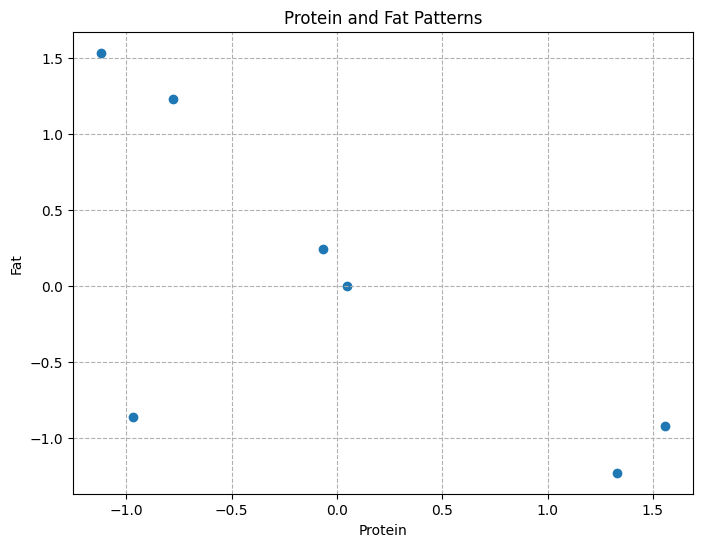

In [7]:
# Select only the feature columns (exclude the target column)
df_k_means = df.iloc[:, 1:]

sc = StandardScaler()

df_scaled = pd.DataFrame(sc.fit_transform(df_k_means), columns=['Protein', 'Fat'])
df_scaled.head()

# visualization
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Protein'], df_scaled['Fat'])
plt.xlabel('Protein')
plt.ylabel('Fat')
plt.grid(axis='both', linestyle='--')
plt.title("Protein and Fat Patterns")
plt.show()

Visualisasi scatter ini menunjukkan penyebaran data makanan berdasarkan nilai Protein dan Fat setelah proses normalisasi, sehingga pola dan perbedaan antar data dapat terlihat lebih jelas sebelum dilakukan clustering.

## K-Means Clustering

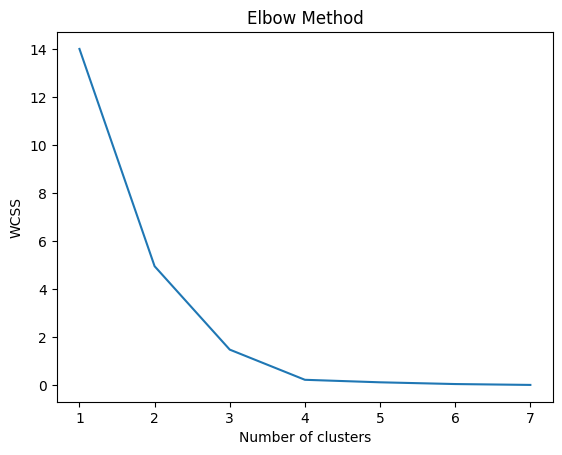

In [8]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 8),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters       WCSS
0                   1  14.000000
1                   2   4.945770
2                   3   1.471002
3                   4   0.213559
4                   5   0.109032
5                   6   0.036468
6                   7   0.000000


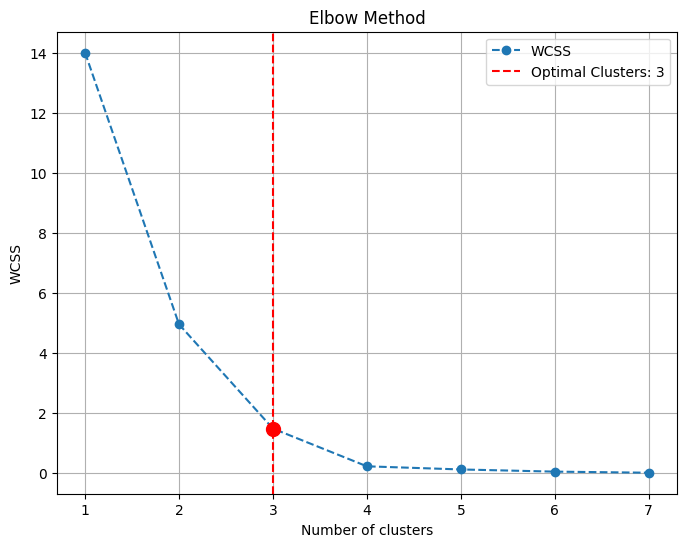

The optimal number of clusters is: 3


In [10]:
# Example WCSS values and cluster numbers
clusters = range(1, 8)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5) # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

Garis putus-putus merah menunjukkan bahwa jumlah cluster terbaik untuk dataset adalah **3**, karena pada titik tersebut penurunan WCSS mulai melambat dan perubahan antar cluster berikutnya tidak lagi signifikan.

In [11]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df['K-Means Cluster'] = clusters

# Show the df
df.head()

,Food Item,Protein,Fat,K-Means Cluster
0,#1,1.1,60,2
1,#2,8.2,20,1
2,#3,4.2,35,0
3,#4,1.5,21,0
4,#5,7.6,15,1


## Model Visualization

In [12]:
# Count how many samples in each cluster
df['K-Means Cluster'].value_counts()

,count
K-Means Cluster,
0,3
2,2
1,2


Hasil tersebut menunjukkan bahwa cluster 0 berisi 3 data, sedangkan cluster 1 dan cluster 2 masing-masing berisi 2 data.

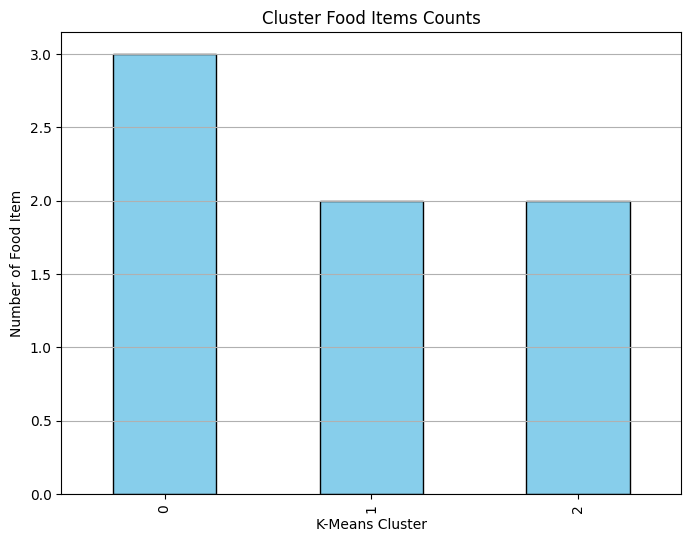

In [13]:
cluster_counts = df['K-Means Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Food Items Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Food Item')
plt.grid(axis='y')
plt.show()

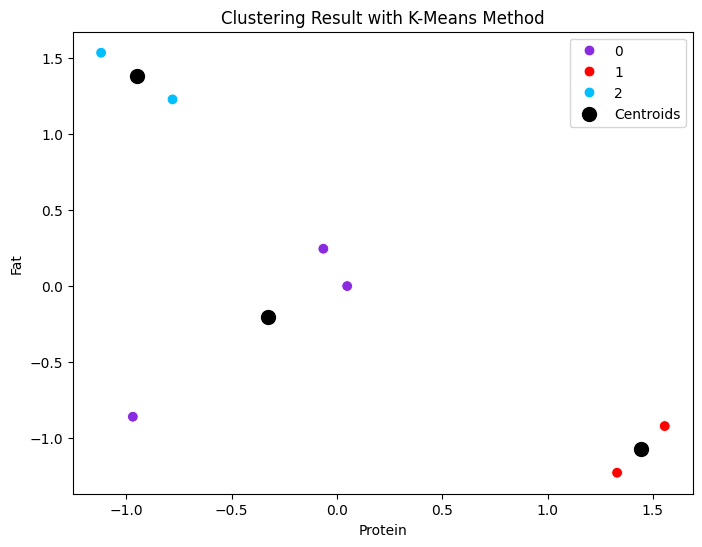

In [14]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(8,6))

sns.scatterplot(x = "Protein", y = "Fat", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="black", label="Centroids")
plt.xlabel("Protein")
plt.ylabel("Fat")
plt.title("Clustering Result with K-Means Method")
plt.legend()
plt.show()

In [15]:
# Group the data by cluster
cluster_summary = df.groupby(clusters).agg({
    'Protein': ['mean', 'min', 'max'],
    'Fat': ['mean', 'min', 'max']
})

# Rename the index
cluster_summary = cluster_summary.rename_axis('K-Means Cluster')

# Rename <lambda> to 'mode'
cluster_summary.columns = cluster_summary.columns.set_levels(
    ['mode' if lvl == '<lambda>' else lvl for lvl in cluster_summary.columns.levels[1]],
    level=1
)

cluster_summary

Protein                  Fat        
                   mean  min  max       mean min max
K-Means Cluster                                     
0                  3.20  1.5  4.2  31.666667  21  39
1                  7.90  7.6  8.2  17.500000  15  20
2                  1.55  1.1  2.0  57.500000  55  60

Cluster summary ini menunjukkan statistik ringkas untuk setiap cluster, di mana ditampilkan nilai rata-rata, minimum, dan maksimum dari fitur Protein dan Fat sehingga karakteristik masing-masing cluster dapat terlihat dengan jelas.

Insight yang diperoleh adalah bahwa setiap cluster memiliki pola gizi yang berbeda:
* **Cluster 0** berisi makanan dengan protein rendah–sedang dan fat menengah.
* **Cluster 1** terdiri dari makanan berprotein lebih tinggi dan fat rendah.
* **Cluster 2** mencakup makanan berprotein rendah tetapi fat sangat tinggi.


## Iris Dataset (Dataset Besar)

## Data Load

In [16]:
#Load Dataset Iris
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
# add data target to the df
df['Y'] = data['target']
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Kolom `Y` ditambahkan ke DataFrame untuk menyimpan label spesies asli (0, 1, 2) dari dataset Iris.

In [18]:
# Display target names
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

The unique values in the 'Y' column represent the different species of Iris flowers:

0: Iris-setosa

1: Iris-versicolor

2: Iris-virginica

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Y                  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


DataFrame kini memiliki lima kolom: empat fitur + satu kolom target.

In [20]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [21]:
df = df.sample(n=len(df)) # Shuffle the rows
print("Number of rows:", len(df))

Number of rows: 150


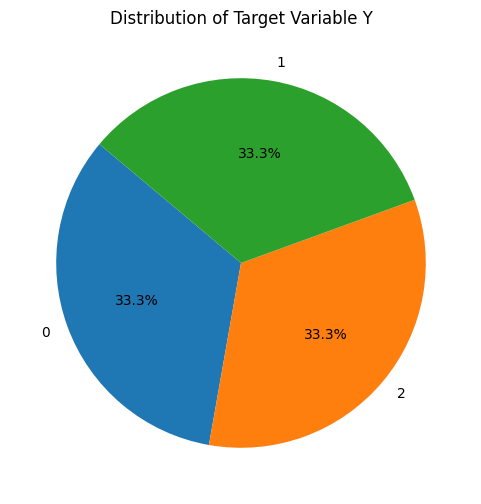

In [22]:
# Get the counts of each unique value in the 'Y' column
y_counts = df['Y'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable Y')
plt.show()

Diagram pie tersebut menunjukkan bahwa persebaran data pada ketiga kelas target (0, 1, dan 2) adalah seimbang, masing-masing sebesar 33.3%.

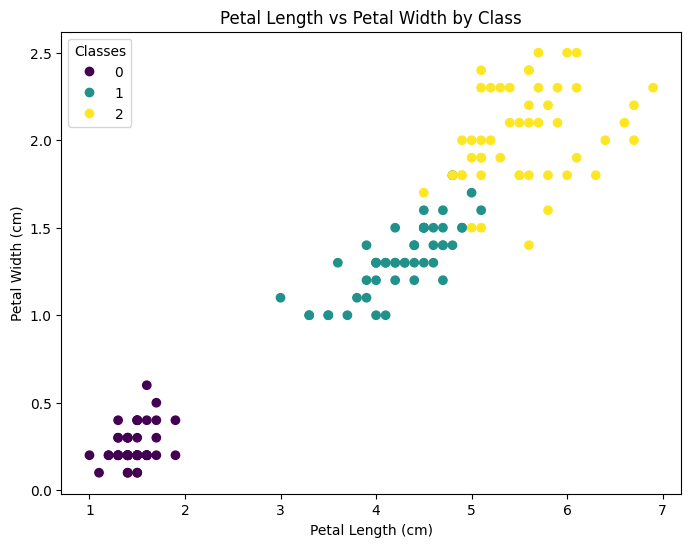

In [23]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Y'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width by Class')
legend = plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

Visualisasi scatter ini menunjukkan bahwa ketiga spesies Iris memiliki pola yang jelas berbeda berdasarkan petal length dan petal width, di mana kelas 0 membentuk kelompok kecil dengan ukuran petal paling kecil, kelas 1 berada di tengah, dan kelas 2 memiliki ukuran petal paling besar.

## Data Preprocessing

In [24]:
# Rename columns in dataset
df = df.rename(columns={
    'sepal length (cm)': 'Sepal Length (cm)',
    'sepal width (cm)': 'Sepal Width (cm)',
    'petal length (cm)': 'Petal Length (cm)',
    'petal width (cm)': 'Petal Width (cm)'
    })

In [25]:
df.isnull().sum()

,0
Sepal Length (cm),0
Sepal Width (cm),0
Petal Length (cm),0
Petal Width (cm),0
Y,0


Tidak ditemukan nilai kosong pada seluruh kolom dataset.

In [26]:
df[df.duplicated(keep=False)]

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Y
142,5.8,2.7,5.1,1.9,2
101,5.8,2.7,5.1,1.9,2


Terdapat baris data duplikat pada indeks 101 dan 142.

In [27]:
# Duplikasi dihapus dengan menyisakan hanya kemunculan pertama
df = df.drop_duplicates(keep='first')

In [28]:
# Drop unused columns: 'sepal length (cm)' and 'sepal width (cm)'
df.drop(['Sepal Length (cm)', 'Sepal Width (cm)'], axis=1, inplace=True)

Kolom `Sepal Length` dan `Sepal Width` dihapus karena hanya dua fitur yang digunakan dalam analisis agar visualisasi clustering lebih sederhana dan fokus pada kombinasi fitur yang dipilih.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 27 to 83
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Petal Length (cm)  149 non-null    float64
 1   Petal Width (cm)   149 non-null    float64
 2   Y                  149 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.7 KB


## Data Scaling

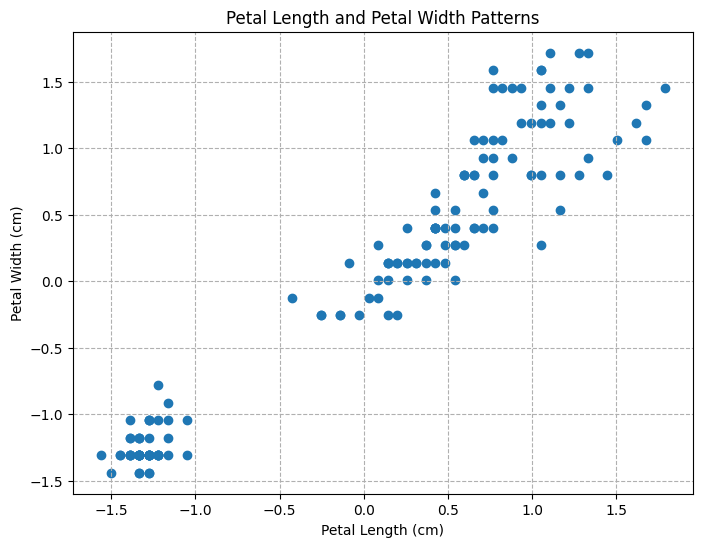

In [30]:
# Select only the feature columns (exclude the target column)
df_k_means = df.iloc[:, :-1]

# Scale dataset with standard scaler
sc = StandardScaler()

df_scaled = pd.DataFrame(sc.fit_transform(df_k_means), columns=['Petal Length (cm)', 'Petal Width (cm)'])
df_scaled.head()

# visualization
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Petal Length (cm)'], df_scaled['Petal Width (cm)'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid(axis='both', linestyle='--')
plt.title("Petal Length and Petal Width Patterns")
plt.show()

Dataset dinormalisasi menggunakan StandardScaler agar skala kedua fitur—petal length dan petal width—seimbang sebelum proses clustering. Scatter plot menampilkan pola penyebaran kedua fitur tersebut, memperlihatkan hubungan linear yang jelas antara panjang dan lebar petal serta membentuk pola yang mudah dipisahkan sebelum dilakukan pengelompokan dengan K-Means.

## K-Means Clustering

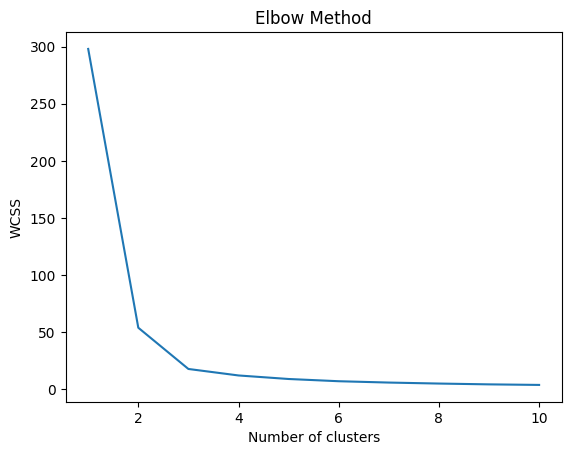

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

print(wcss_table)

   Number of Clusters        WCSS
0                   1  298.000000
1                   2   53.976317
2                   3   17.878032
3                   4   12.198707
4                   5    9.104802
5                   6    7.148701
6                   7    5.980496
7                   8    5.113869
8                   9    4.402647
9                  10    3.917228


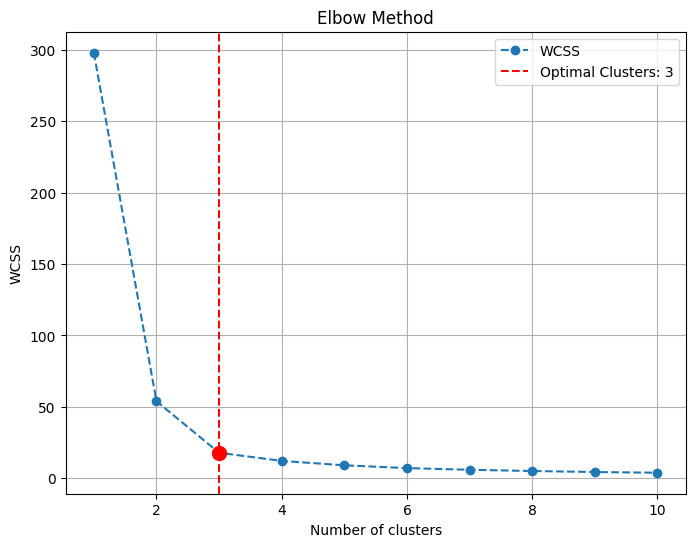

The optimal number of clusters is: 3


In [33]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5) # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

Grafik Elbow Method menunjukkan bahwa titik siku berada pada jumlah cluster **3**, sehingga K=3 merupakan jumlah cluster yang paling optimal untuk dataset ini.

In [34]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df['K-Means Cluster'] = clusters

# Show the df
df.head()

,Petal Length (cm),Petal Width (cm),Y,K-Means Cluster
27,1.5,0.2,0,1
28,1.4,0.2,0,1
142,5.1,1.9,2,2
64,3.6,1.3,1,0
44,1.9,0.4,0,1


## Model Visualization

In [35]:
# Count how many samples in each cluster
df['K-Means Cluster'].value_counts()

,count
K-Means Cluster,
0,52
1,50
2,47


Cluster 0 berisi 52 data, cluster 1 berisi 50 data, dan cluster 2 berisi 47 data, yang menunjukkan distribusi cluster cukup seimbang.

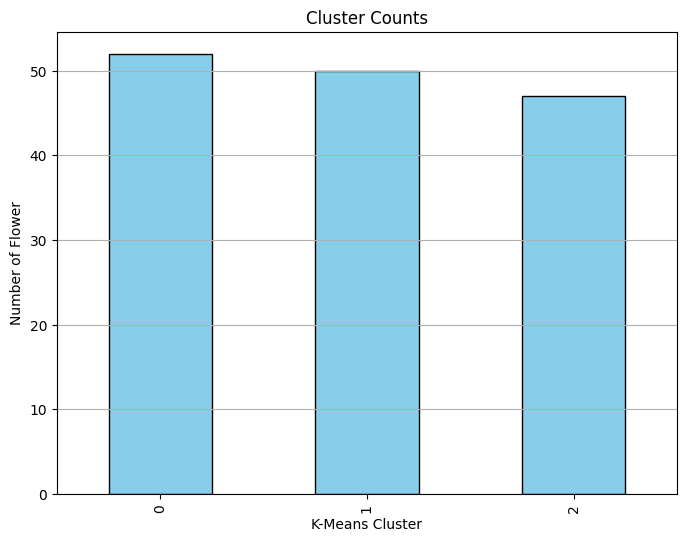

In [36]:
cluster_counts = df['K-Means Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Flower')
plt.grid(axis='y')
plt.show()

In [37]:
cm = confusion_matrix(df['Y'], kmeans.labels_)
df_cl_iris = pd.DataFrame(cm,
                     index=['Iris-setosa', 'Versicolor', 'Virginica'],
                     columns=['Cluster 0', 'Cluster 1', 'Cluster 2'])
df_cl_iris

,Cluster 0,Cluster 1,Cluster 2
Iris-setosa,0,50,0
Versicolor,48,0,2
Virginica,4,0,45


Matriks ini menunjukkan bahwa algoritma K-Means memisahkan tiga spesies Iris dengan cukup baik, di mana setosa dan virginica terkelompok jelas, sementara sebagian besar versicolor tercampur ke cluster 0.

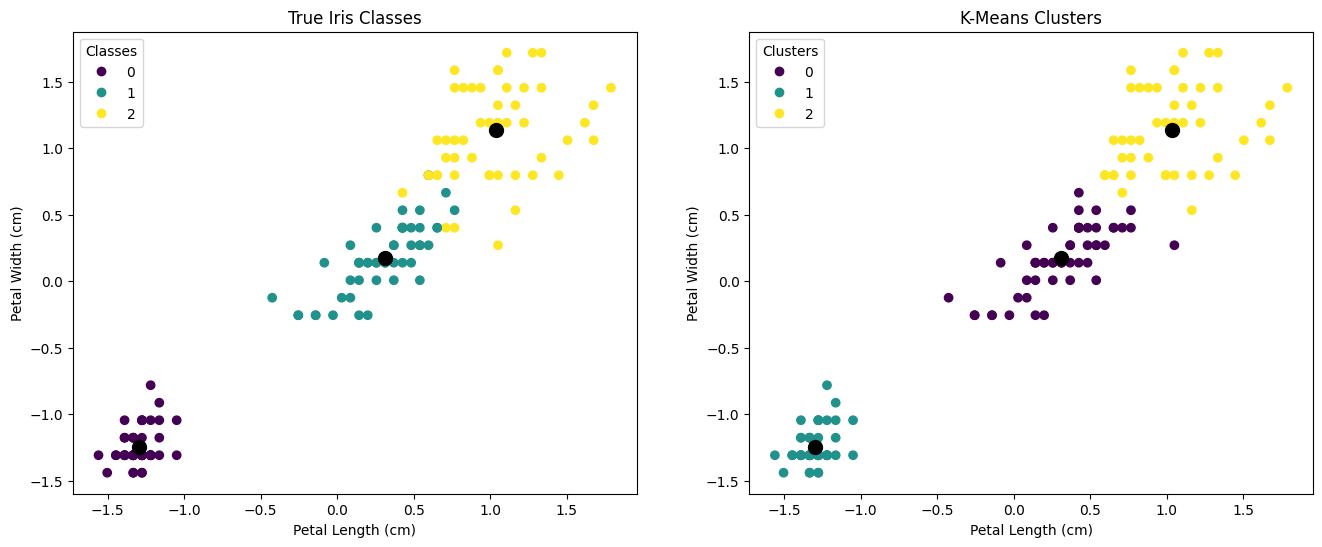

In [38]:
plt.figure(figsize=(16, 6))

# True classes
plt.subplot(1, 2, 1)
scatter = plt.scatter(df_scaled['Petal Length (cm)'], df_scaled['Petal Width (cm)'], c=df['Y'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="black", label="Centroids")
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('True Iris Classes')
legend = plt.legend(*scatter.legend_elements(), title="Classes")

# K-Means clusters
plt.subplot(1, 2, 2)
scatter = plt.scatter(df_scaled['Petal Length (cm)'], df_scaled['Petal Width (cm)'], c=df['K-Means Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="black", label="Centroids")
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clusters')
legend = plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()

Visualisasi ini membandingkan kelas asli Iris dengan hasil clustering K-Means, dan terlihat bahwa algoritma berhasil memisahkan setosa dan virginica dengan baik, meskipun beberapa data versicolor masih tumpang tindih dengan cluster lain.

In [39]:
# Group the data by cluster
cluster_summary = df.groupby(clusters).agg({
    'Petal Length (cm)': ['mean', 'min', 'max'],
    'Petal Width (cm)': ['mean', 'min', 'max']
})

# Rename the index
cluster_summary = cluster_summary.rename_axis('K-Means Cluster')

cluster_summary

Petal Length (cm)           Petal Width (cm)          
                             mean  min  max             mean  min  max
K-Means Cluster                                                       
0                        4.296154  3.0  5.6         1.325000  1.0  1.7
1                        1.462000  1.0  1.9         0.246000  0.1  0.6
2                        5.576596  4.8  6.9         2.059574  1.6  2.5

Ringkasan ini menunjukkan bahwa setiap cluster memiliki karakteristik petal yang berbeda: cluster 1 memiliki petal paling kecil, cluster 2 memiliki petal paling besar, dan cluster 0 berada di tengah sebagai kelompok dengan ukuran petal menengah.